# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

### Download data

In [5]:
from urllib.request import urlretrieve
import os

def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')
        
download('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip', 'traffic-sign-data.zip')
# download('http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Training_Images.zip', 'GTSRB_Final_Training_Images.zip')
# download('http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Test_Images.zip', 'GTSRB_Final_Test_Images.zip')

### Uncompress ZIP

In [6]:
import zipfile

def uncompress(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall('.')
    zip_ref.close()
    

# Get the features and labels from the zip files
uncompress('traffic-sign-data.zip')
# uncompress('GTSRB_Final_Training_Images.zip')
# uncompress('GTSRB_Final_Test_Images.zip')

### Extract Train, Validation, Test Data from Pickle

In [7]:
# Load pickled data
import pickle
import numpy as np

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [8]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_images(X, end, total, images_per_row = 30, images_per_col = 15,
                H = 20, W = 1, its_gray = False):    
    number_of_images = images_per_row * images_per_col
    figure, axis = plt.subplots(images_per_col, images_per_row, figsize=(H, W))
    figure.subplots_adjust(hspace = .2, wspace=.001)
    axis = axis.ravel()
    
    for i in range(number_of_images):
        index = np.random.randint(end - total, end - 1)
        image = X[index]
        axis[i].axis('off')
        if its_gray:
          axis[i].imshow(image.reshape(32,32), cmap='gray')
        else:
          axis[i].imshow(image)

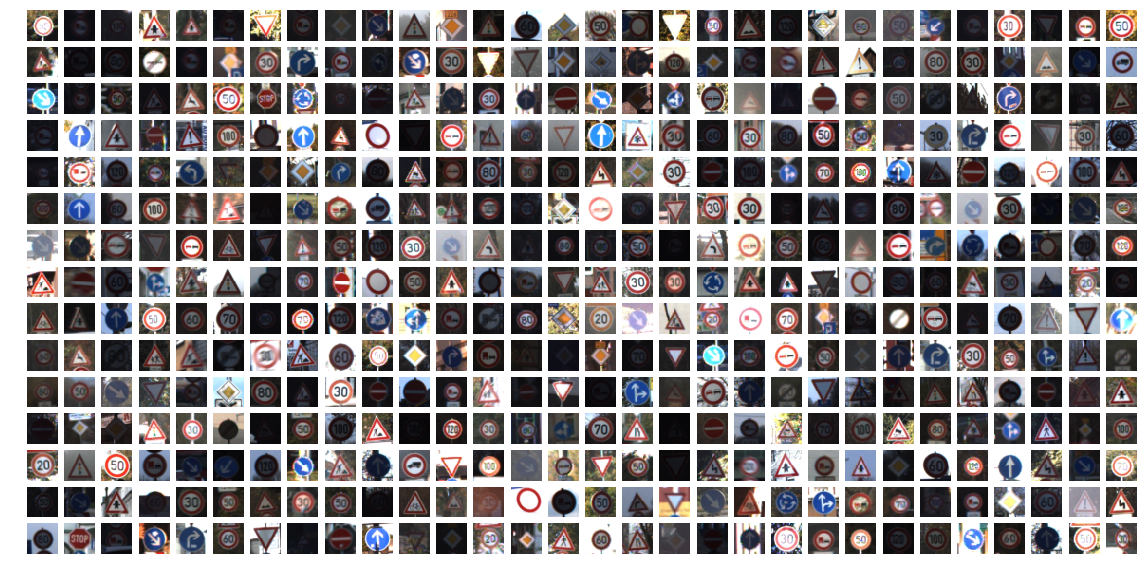

In [10]:
#PLOT 350 RANDOM IMAGES from training set
show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 30, images_per_col = 15, 
            H = 20, W = 10)

#### Dataset Class Distributions

Visualize as bar chart for entire training set.

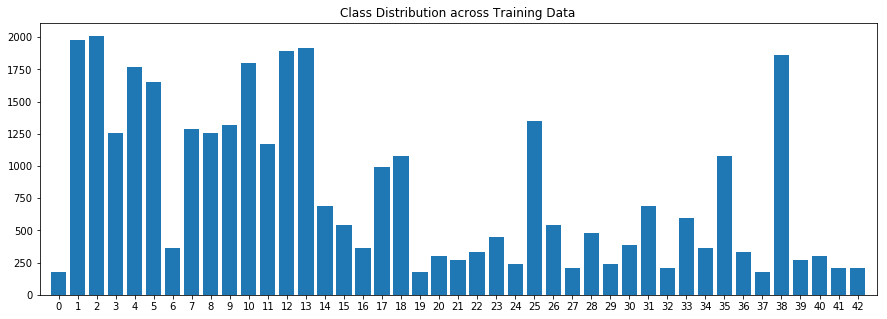

In [11]:
# Count frequency of each label
labels, counts = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution across Training Data')
plt.show()

As observed above, training set is not equally distributed amongst classes. Hence it is required to generate few images using translation and rotation using existing images for all those who has lesser images. 

This could help Model to not get biased to particular classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Data Augmentation

As dataset is not evenly distributed, it is required to generate some data with rot90, rot180, translation etc methods for some of the classes

In [12]:
from scipy.ndimage import rotate
from sklearn.utils import shuffle

def generate_additional_data_rotate(x, y):
    for i in range(43):
        indexes = y == i
        count = np.sum(indexes)
        x_train_sample = x[indexes]
        y_train_sample = y[indexes]
        if count < 500:
            # three random angles between -10 to 10 degress
            three_random_angles = 20.0*np.random.random_sample(3) - 10.0
            x1 = rotate(x_train_sample, three_random_angles[0], axes=(1,2), reshape=False)
            x2 = rotate(x_train_sample, three_random_angles[1], axes=(1,2), reshape=False)
            x3 = rotate(x_train_sample, three_random_angles[2], axes=(1,2), reshape=False)
            X_additional = np.concatenate((x1, x2, x3))
            x = np.concatenate((x, X_additional))
            y = np.concatenate((y, y_train_sample, y_train_sample, y_train_sample))
        elif count < 1000:
            # one random angles between -10 to 10 degress
            one_random_angle = 20.0*np.random.random_sample(1) - 10.0
            x1 = rotate(x_train_sample, one_random_angle[0], axes=(1,2), reshape=False)
            x = np.concatenate((x, x1))
            y = np.concatenate((y, y_train_sample))
            
    return x, y

X_train, y_train = generate_additional_data_rotate(X_train, y_train)

def generate_additional_data_translate(x, y):
    num_total = y.shape[0]
    first_break = int(num_total/3)
    second_break = 2*first_break
    x_sample_1 = x[0:first_break]
    x_sample_2 = x[first_break:second_break]
    x_sample_3 = x[second_break:]
    y1 = y[0:first_break]
    y2 = y[first_break:second_break]
    y3 = y[second_break:]
    
    random_integer = 0
    while(random_integer == 0):
        random_integer = np.random.randint(-4,4)
    x1 = np.roll(x_sample_1, random_integer, axis=2)
    
    random_integer = 0
    while(random_integer == 0):
        random_integer = np.random.randint(-4,4)
    x2 = np.roll(x_sample_2, random_integer, axis=2)
        
    random_integer = 0
    while(random_integer == 0):
        random_integer = np.random.randint(-4,4)
    x3 = np.roll(x_sample_3, random_integer, axis=2)
    
    x = np.concatenate((x, x1, x2, x3))
    y = np.concatenate((y, y1, y2, y3))
    return x, y

X_train, y_train = generate_additional_data_translate(X_train, y_train)

Generate updated validation set by spliting training set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=832289)

In [14]:
n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 102650
Number of validation examples = 11406
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


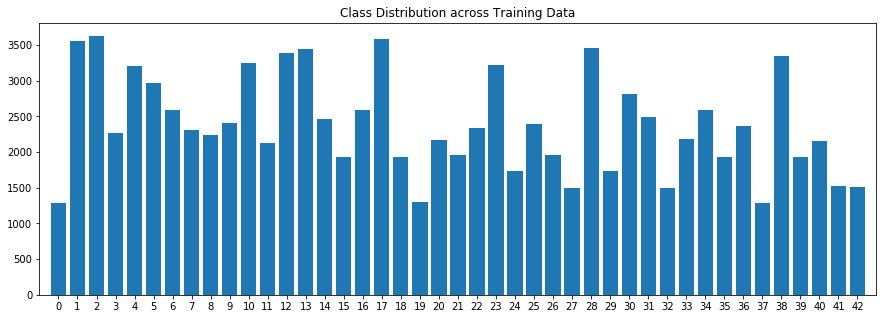

In [15]:
# Count frequency of each label
labels, counts = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution across Training Data')
plt.show()

As we can see from the above graph, all the classes who had less number of images are now has enough data (>1000)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [16]:
import cv2

print("Using OpenCV version: %s" % (cv2.__version__))

Using OpenCV version: 3.4.1


#### Image Preprocessing

There are lot of image corrections required for dataset, as lot of images are really dark and some are too bright and requires some amount of correction at pixel level. 

As per the [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) taking YUV of the image and operating model on Y only or normalized Y would have significant improvement on model accuracy.

Below cells will perform some pre-processing for entire dataset

In [17]:
def auto_contrast(img):
    '''
    Adjust contrast for the image automatically
    '''
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8, 8))

    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel

    lab = cv2.merge((l2, a, b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)  # convert from LAB to RGB
    return img2


def auto_brightness(image):
    '''
    Adjust brightness for the image automatically
    '''
    image1 = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype=np.float64)
    random_bright = .5 + np.random.uniform()
    image1[:, :, 2] = image1[:, :, 2] * random_bright
    image1[:, :, 2][image1[:, :, 2] > 255] = 255
    image1 = np.array(image1, dtype=np.uint8)
    image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    return image1

def convert_grayscale(image):
    YCrCb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return np.expand_dims(YCrCb[:,:,0], axis = 2)

def normalize(image):
    return np.divide(np.subtract(image, 128.0), 128.0)

def resize(image):
    return cv2.resize(image, (32, 32))

Perform Preprocess pipeline on sample image before updating entire dataset.

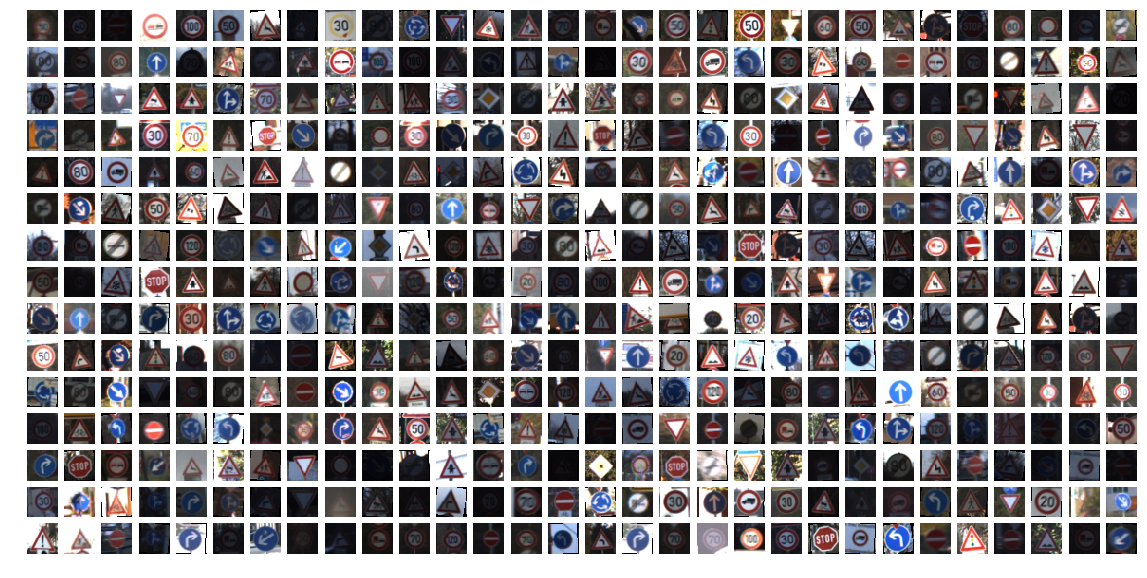

In [18]:
np.random.seed(1234)

#PLOT 50 RANDOM IMAGES from training set
show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 30, images_per_col = 15, 
            H = 20, W = 10)

In [19]:
def image_preprocess(image):
    # image = resize(image)
    image = auto_contrast(image)
    # image = auto_brightness(image)
    image = convert_grayscale(image)
    image = normalize(image)
    return image

Apply preprocessing pipeline on entire dataset

In [ ]:
# Perform Pre-processing for entire dataset (training, test, validation sets)
X_train = np.array([image_preprocess(x) for x in X_train])
X_valid = np.array([image_preprocess(x) for x in X_valid])
X_test = np.array([image_preprocess(x) for x in X_test])

#### Question 1

*Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)*

As displayed in above grid of the dataset images, it can be seen that there were lot of images which are very dark/bright, here it is strongly required for them to adjusted Contrast for them. Also as per the [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), grayscale images tend to improve ConvNets performance hence it was opted to convert all the color images to grayscale after correcting contrast.

My preprocessing pipeline is as follows:

1. Use Contrast Limited Adaptive Histogram Equalization (CLAHE) in order to apply auto contrast adjustment for the image
2. Convert image to GrayScale (used `cv2.cvtColor` for conversion)
3. Normalize Image by applying equation `(pixel - 128) / 128`

Result of the preprocessing pipeline is as follows:

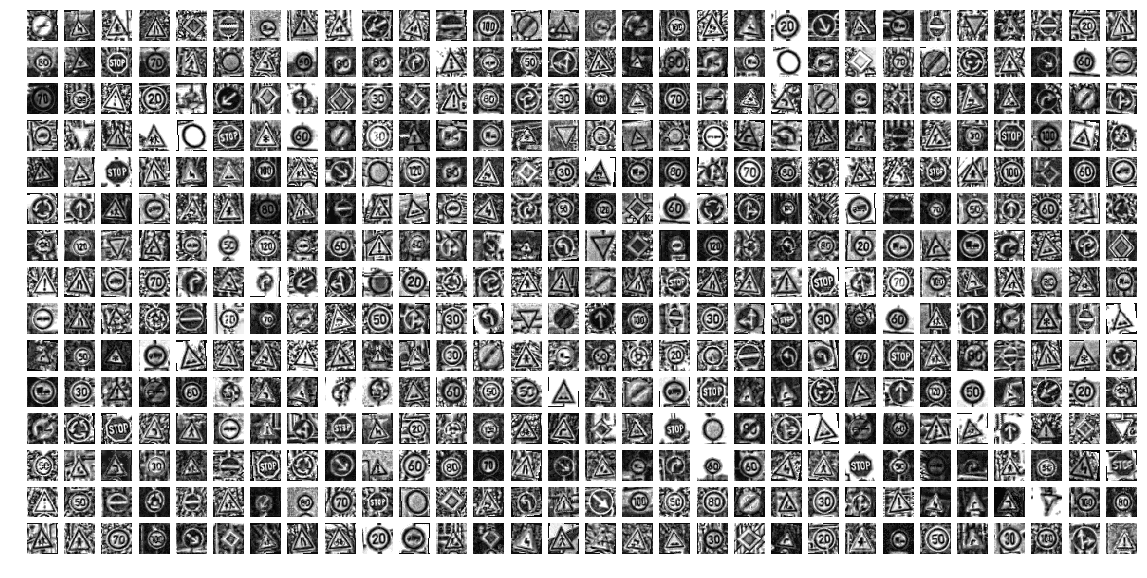

In [49]:
np.random.seed(1234)

# PLOT 350 RANDOM IMAGES from training set
show_images(X_train, len(X_train), len(X_train), 
            images_per_row = 30, images_per_col = 15, 
            H = 20, W = 10, its_gray=True)

### Model Architecture

In [22]:
import tensorflow as tf

print("Using TensorFlow version: %s" % (tf.__version__))

Using TensorFlow version: 1.6.0


In [23]:
def preprocess_op(x):
    with tf.variable_scope('P0'):
        p0 = tf.image.resize_images(x, size = (32, 32))
        # p0 = tf.image.convert_image_dtype(x, tf.float32)
        # p0 = tf.image.rgb_to_grayscale(p0)
        # p0 = tf.image.random_brightness(p0, max_delta=0.5, seed=1234)
        # p0 = tf.image.random_contrast(p0, lower=0.4, upper=0.6, seed=1234)
        ## Normalize Tensors
        # p0 = tf.divide(tf.subtract(tf.cast(p0, tf.float32), 128.0), 128.0)
        print("P0: Input %s Output %s" % (x.get_shape(), p0.get_shape()))
        return p0

#### Basic LeNet-5 Architecture

![Lenet_Architecture](lenet.png)

#### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

#### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

#### Output
Return the result of the 2nd fully connected layer.

In [24]:
def SingleScaleLeNet(x, use_dropout=False):
    mu = 0
    sigma = 0.1
    
    print("Single scale LeNet", " with dropout" if use_dropout else "")
    
    # Input 32x32x3 Output 32x32x1
    p0 = preprocess_op(x)
    
    _, w, h, c = p0.get_shape().as_list()
    
    # C1: Input 32x32x3, Output: 28x28x6
    with tf.variable_scope('C1'):
        weight1 = tf.Variable(tf.truncated_normal(shape=(5, 5, c, 6), mean=mu, stddev=sigma))
        bias1 = tf.Variable(tf.zeros(shape=(6)))
        conv1 = tf.nn.conv2d(p0, weight1, strides=(1, 1, 1, 1), padding='VALID')
        conv1 = tf.add(conv1, bias1)
        conv1 = tf.nn.relu(conv1)
        if use_dropout: 
            conv1 = tf.nn.dropout(conv1, keep_prob=0.5)
        print("C1: Input %s Output %s" % (p0.get_shape(), conv1.get_shape()))

    # S2: Input 28x28x6, Output: 14x14x6
    with tf.variable_scope('S2'):
        pool1 = tf.nn.max_pool(conv1, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
        print("S2: Input %s Output %s" % (conv1.get_shape(), pool1.get_shape()))

    # C3: Input 14x14x6, Output: 10x10x16
    with tf.variable_scope('C3'):
        weight2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
        bias2 = tf.Variable(tf.zeros(shape=(16)))
        conv2 = tf.nn.conv2d(pool1, weight2, strides=(1, 1, 1, 1), padding='VALID')
        conv2 = tf.add(conv2, bias2)
        conv2 = tf.nn.relu(conv2)
        if use_dropout: 
            conv2 = tf.nn.dropout(conv2, keep_prob=0.5)
        print("C3: Input %s Output %s" % (pool1.get_shape(), conv2.get_shape()))

    # S4: Input 10x10x16, Output 5x5x16
    with tf.variable_scope('S4'):
        pool2 = tf.nn.max_pool(conv2, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')
        print("S4: Input %s Output %s" % (conv2.get_shape(), pool2.get_shape()))

    # C5: Input 5x5x16, Output 1x120
    with tf.variable_scope('C5'):
        fc1 = tf.contrib.layers.flatten(pool2)
        weight3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
        bias3 = tf.Variable(tf.zeros(shape=(120)))
        fc1 = tf.matmul(fc1, weight3)
        fc1 = tf.add(fc1, bias3)
        fc1 = tf.nn.relu(fc1)
        if use_dropout: 
            fc1 = tf.nn.dropout(fc1, keep_prob=0.5)
        print("C5: Input %s Output %s" % (pool2.get_shape(), fc1.get_shape()))

    # F6: Input 1x120, Output 1x84
    with tf.variable_scope('F6'):
        weights4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
        bias4 = tf.Variable(tf.zeros(shape=(84)))
        fc2 = tf.matmul(fc1, weights4)
        fc2 = tf.add(fc2, bias4)
        fc2 = tf.nn.relu(fc2)
        if use_dropout: 
            fc2 = tf.nn.dropout(fc2, keep_prob=0.5)
        print("F6: Input %s Output %s" % (fc1.get_shape(), fc2.get_shape()))

    # F7: Input 1x84, Output 1x10
    with tf.variable_scope('F7'):
        weight5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
        bias5 = tf.Variable(tf.zeros(shape=(43)))
        logits = tf.matmul(fc2, weight5)
        logits = tf.add(logits, bias5)
        print("F7: Input %s Output %s" % (fc2.get_shape(), logits.get_shape()))

    return logits

### Question 2

*Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.*

#### Multiscale LeNet Architecture

![LeNet_MS_Architecture](lenet_ms.png)

#### Input
The Multiscale LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since GTSRB images are colored but preprocessed into gray, C is 1 in this case.

#### Architecture
**Layer 1: Convolutional.** The output shape should be 32x32x32.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 16x16x32.

**Layer 2: Convolutional.** The output shape should be 16x16x64.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 8x8x64.

**Layer 3: Convolutional.** The output shape should be 8x8x128.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 4x4x128.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Concat.** Flatten the result of pooling from layer-1 convolution and layer 2 convolution with kernel of 4x4 and 2x2 respectively, and concat with last flatten layer. The output shape should be 1x3584. The easiest way to concat is by `tf.concat`.

**Layer 4: Fully Connected.** This should have 1024 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

#### Output
Return the result of the 2nd fully connected layer.

In [42]:
def MultiScaleLeNet(x, use_dropout=False):
    mu = 0
    sigma = 0.1
    
    print("Multiscale LeNet", " with dropout" if use_dropout else "")
    
    # Input 32x32x3 Output 32x32x1
    p0 = preprocess_op(x)
    
    _, w, h, c = p0.get_shape().as_list()
    
    # C1: Input 32x32x1 Output 32x32x32
    with tf.variable_scope('C1'):
        weight1 = tf.Variable(tf.truncated_normal(shape = (5, 5, c, 32), mean = mu, stddev = sigma))
        bias1 = tf.Variable(tf.zeros(shape = (32)))
        conv1 = tf.nn.conv2d(p0, weight1, strides = (1, 1, 1, 1), padding = 'SAME')
        conv1 = tf.add(conv1, bias1)
        conv1 = tf.nn.relu(conv1)
        print("C1: Input %s Output %s" % (p0.get_shape(), conv1.get_shape()))
        if use_dropout: 
            conv1 = tf.nn.dropout(conv1, keep_prob=0.5)
    
    # S2: Input 32x32x32 Output 16x16x32
    with tf.variable_scope('S2'):
        pool1 = tf.nn.max_pool(conv1, ksize = (1, 2, 2, 1), strides = (1, 2, 2, 1), padding = 'VALID')
        print("S2: Input %s Output %s" % (conv1.get_shape(), pool1.get_shape()))

    # C3: Input 16x16x32 Output 16x16x64
    with tf.variable_scope('C3'):
        weight2 = tf.Variable(tf.truncated_normal(shape = (5, 5, 32, 64), mean = mu, stddev = sigma))
        bias2 = tf.Variable(tf.zeros(shape = (64)))
        conv2 = tf.nn.conv2d(pool1, weight2, strides = (1, 1, 1, 1), padding = 'SAME')
        conv2 = tf.add(conv2, bias2)
        conv2 = tf.nn.relu(conv2)
        print("C3: Input %s Output %s" % (pool1.get_shape(), conv2.get_shape()))
        if use_dropout: 
            conv2 = tf.nn.dropout(conv2, keep_prob=0.5)

    # S4: Input 16x16x64 Output 8x8x64
    with tf.variable_scope('S4'):
        pool2 = tf.nn.max_pool(conv2, ksize = (1, 2, 2, 1), strides = (1, 2, 2, 1), padding = 'VALID')
        print("S4: Input %s Output %s" % (conv2.get_shape(), pool2.get_shape()))
    
    # C5: Input 8x8x64 Output 8x8x128
    with tf.variable_scope('C5'):
        weight3 = tf.Variable(tf.truncated_normal(shape = (5, 5, 64, 128), mean = mu, stddev = sigma))
        bias3 = tf.Variable(tf.zeros(shape = (128)))
        conv3 = tf.nn.conv2d(pool2, weight3, strides = (1, 1, 1, 1), padding = 'SAME')
        conv3 = tf.add(conv3, bias3)
        conv3 = tf.nn.relu(conv3)
        print("C5: Input %s Output %s" % (pool2.get_shape(), conv3.get_shape()))
        if use_dropout: 
            conv3 = tf.nn.dropout(conv3, keep_prob=0.5)
    
    # S6: Input 8x8x128 Output 4x4x128
    with tf.variable_scope('S6'):
        pool3 = tf.nn.max_pool(conv3, ksize = (1, 2, 2, 1), strides = (1, 2, 2, 1), padding = 'VALID')
        print("S6: Input %s Output %s" % (conv3.get_shape(), pool3.get_shape()))
    
    # S7 Input [1x2048, 1x1024, 1x512] Output 1x3584
    with tf.variable_scope('S7'):
        # S7(0): Input 4x4x128 Output 1x2048
        fc00 = tf.contrib.layers.flatten(pool3)
        # S7(1): Input 8x8x64 --> 4x4x64 --> Output 1x1024
        pool4 = tf.nn.max_pool(pool2, ksize = (1, 2, 2, 1), strides = (1, 2, 2, 1), padding = 'VALID')
        fc01 = tf.contrib.layers.flatten(pool4)
        # S7(2): Input 16x16x32 --> 4x4x32 --> Output 1x512
        pool5 = tf.nn.max_pool(pool1, ksize = (1, 4, 4, 1), strides = (1, 4, 4, 1), padding = 'VALID')
        fc02 = tf.contrib.layers.flatten(pool5)

        # S7 Input [1x2048, 1x1024, 1x512] Output 1x3584
        fc0 = tf.concat([fc00, fc01, fc02], axis = 1)
        print("S7: Inputs [%s, %s, %s] Output %s" % (fc00.get_shape(), fc01.get_shape(), fc02.get_shape(), fc0.get_shape()))
        
    # F8 Input 1x3584 Output 1x1024
    with tf.variable_scope('F8'):
        weight4 = tf.Variable(tf.truncated_normal(shape = (3584, 1024), mean = mu, stddev = sigma))
        bias4 = tf.Variable(tf.zeros(shape = (1024)))
        fc1 = tf.add(tf.matmul(fc0, weight4), bias4)
        fc1 = tf.nn.relu(fc1)
        print("F8: Input %s Output %s" % (fc0.get_shape(), fc1.get_shape()))
        if use_dropout: 
            fc1 = tf.nn.dropout(fc1, keep_prob=0.5)

    # F9 Input 1x1024 Output 1x43
    with tf.variable_scope('F9'):
        weight5 = tf.Variable(tf.truncated_normal(shape = (1024, 43), mean = mu, stddev = sigma))
        bias5 = tf.Variable(tf.zeros(shape = (43)))
        logits = tf.add(tf.matmul(fc1, weight5), bias5)
        print("F9: Input %s Output %s" % (fc1.get_shape(), logits.get_shape()))

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [43]:
height, width, channels = X_train[0].shape
x = tf.placeholder(tf.float32, shape=(None, height, width, channels))
y = tf.placeholder(tf.int32, shape=(None))
one_hot_y = tf.one_hot(y, 43)

In [67]:
rate = 0.001

# logits = SingleScaleLeNet(x, use_dropout=False) # Takes only 2nd stage output to classifier
logits = MultiScaleLeNet(x, use_dropout=False)  # Takes 1st and 2nd stage outputs to classifier
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operations = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operations)

Multiscale LeNet 
P0: Input (?, 32, 32, 1) Output (?, 32, 32, 1)
C1: Input (?, 32, 32, 1) Output (?, 32, 32, 32)
S2: Input (?, 32, 32, 32) Output (?, 16, 16, 32)
C3: Input (?, 16, 16, 32) Output (?, 16, 16, 64)
S4: Input (?, 16, 16, 64) Output (?, 8, 8, 64)
C5: Input (?, 8, 8, 64) Output (?, 8, 8, 128)
S6: Input (?, 8, 8, 128) Output (?, 4, 4, 128)
S7: Inputs [(?, 2048), (?, 1024), (?, 512)] Output (?, 3584)
F8: Input (?, 3584) Output (?, 1024)
F9: Input (?, 1024) Output (?, 43)


In [68]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operations], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

### Question 3

*Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.*

To train a model I used Adam Optimizer with batch_size of 128 for the 30 epochs to obtain validation accuracy of **99.3%**. 

Summary of all the tuned Hyperparameters:
1. Learning Rate = 0.001
2. Mean for Weights matrix initialization = 0
3. Standard Deviation for Weights matrix initialization = 0.1
4. Number of Epochs = 30
5. Batch Size = 128
6. Optimizer = Adam Optimizer

In [69]:
EPOCHS = 20
BATCH_SIZE = 128

In [73]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy, training_loss = evaluate(X_train, y_train)
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f} Loss = {:.3f}".format(training_accuracy, training_loss))
        print("Validation Accuracy = {:.3f} Loss = {:.3f}".format(validation_accuracy, validation_loss))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.984 Loss = 0.050
Validation Accuracy = 0.977 Loss = 0.071

EPOCH 2 ...
Training Accuracy = 0.996 Loss = 0.014
Validation Accuracy = 0.991 Loss = 0.027

EPOCH 3 ...
Training Accuracy = 0.998 Loss = 0.007
Validation Accuracy = 0.995 Loss = 0.016

EPOCH 4 ...
Training Accuracy = 0.994 Loss = 0.019
Validation Accuracy = 0.988 Loss = 0.038

EPOCH 5 ...
Training Accuracy = 0.998 Loss = 0.007
Validation Accuracy = 0.996 Loss = 0.014

EPOCH 6 ...
Training Accuracy = 0.995 Loss = 0.014
Validation Accuracy = 0.994 Loss = 0.022

EPOCH 7 ...
Training Accuracy = 0.998 Loss = 0.009
Validation Accuracy = 0.994 Loss = 0.018

EPOCH 8 ...
Training Accuracy = 0.996 Loss = 0.011
Validation Accuracy = 0.994 Loss = 0.023

EPOCH 9 ...
Training Accuracy = 0.997 Loss = 0.009
Validation Accuracy = 0.993 Loss = 0.025

EPOCH 10 ...
Training Accuracy = 0.997 Loss = 0.009
Validation Accuracy = 0.995 Loss = 0.016

EPOCH 11 ...
Training Accuracy = 0.994 Loss = 0.038
Vali

### Evaluate Model with Test Set

In [75]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, _ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.958


### Question 4

*Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.*

My final model results are: 

In [76]:
print("Training set accuracy = {:.3f}".format(training_accuracy))
print("Validation set accuracy = {:.3f}".format(validation_accuracy))
print("Test set accuracy = {:.3f}".format(test_accuracy))

Training set accuracy = 1.000
Validation set accuracy = 0.999
Test set accuracy = 0.958


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

nongtsrb/17_noentry.jpg
nongtsrb/29_bicyclecrossing.jpg
nongtsrb/34_turnleftahead.jpg
nongtsrb/1_speedlimit30.jpg
nongtsrb/3_speedlimit60.jpg
nongtsrb/25_roadwork.jpg
nongtsrb/14_stop.jpg
Number of test images = 7
[17, 29, 34, 1, 3, 25, 14]


(32, 32, 3)

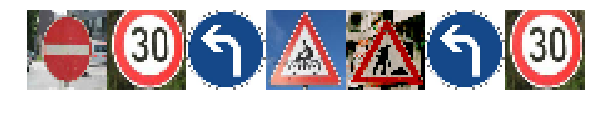

In [118]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

filelist = glob.glob("nongtsrb/*.jpg")

test_images = []
test_labels = []
for filename in filelist:
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    test_images.append(image)
    print(filename)
    l = int(os.path.basename(filename).split("_")[0])
    test_labels.append(l)
print("Number of test images =", len(test_images))
show_images(test_images, len(test_images), len(test_images), 
            images_per_row = len(filelist), images_per_col = 1, 
            H = 10, W = 10, its_gray=False)
print(test_labels)
test_images[0].shape

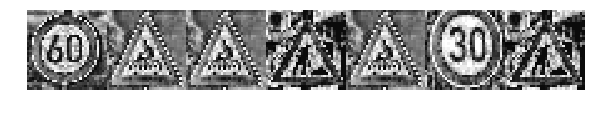

In [119]:
# Apply preprocess pipe
test_images = np.array([image_preprocess(i) for i in test_images])
show_images(test_images, len(test_images), len(test_images), 
            images_per_row = len(filelist), images_per_col = 1, 
            H = 10, W = 10, its_gray=True)

### Question 1

*Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.*

### Predict the Sign Type for Each Image

In [120]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    predicted_logits = sess.run(logits, feed_dict={x: test_images})
    output = np.argmax(predicted_logits, axis=1)
    print("Predicted   :", output)
    print("Ground Truth:", np.array(test_labels))
    

INFO:tensorflow:Restoring parameters from ./lenet
Predicted   : [17 29 34  1  3 25 14]
Ground Truth: [17 29 34  1  3 25 14]


### Question 2

*Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).*

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Question 3

*Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)*

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 4

*Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?*